In [1]:
import cv2
import numpy as np

In [66]:
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pathlib

In [8]:
path = pathlib.Path("C:/Users/SREEHARI CR/data science/machine_test")

In [29]:
Hyundai_Creta = list(path.glob("Hyundai_Creta/*"))
mammokka = list(path.glob("mammokka/*"))
Rolls_Royce=list(path.glob("Rolls_Royce/*"))
Swift=list(path.glob("Swift/*"))
Toyota_Innova=list(path.glob("Toyota_Innova/*"))
train=['Hyundai_Creta','mammoty','Rolls_Royce','Swift','Toyota_Innova']

In [30]:
len(mammokka)

125

In [47]:
pic_dict = {"Hyundai_Creta":Hyundai_Creta,"mammokka": mammokka, "Rolls_Royce":Rolls_Royce,"Swift" : Swift,"Toyota_Innova":Toyota_Innova}

In [41]:
clas= {"Hyundai_Creta":0, "mammokka":1 ,"Rolls_Royce":2,"Swift":3,"Toyota_Innova":4,}

In [42]:
clas

{'Hyundai_Creta': 0,
 'mammokka': 1,
 'Rolls_Royce': 2,
 'Swift': 3,
 'Toyota_Innova': 4}

In [50]:
x = []
y = []

In [51]:
import cv2

In [52]:
for i in pic_dict:
    pic_name = i
    pic_path_list = pic_dict[pic_name]
    for path in pic_path_list:
        img = cv2.imread(str(path))
        img = cv2.resize(img, (100,100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255 #normalization
        x.append(img)
        y.append(clas[i])


In [54]:
len(x)

558

In [55]:
len(y)

558

In [56]:
x1=np.array(x)

In [57]:
y1=np.array(y)

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=.20,random_state=1)

In [63]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(100,100,3),padding="valid",strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=15,kernel_size=(3,3),padding="valid",strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(70,activation='relu'))
model.add(Dense(30,activation='relu'))         
model.add(Dense(10,activation='softmax'))     

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 15)        4335      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 15)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7935)              0         
                                                                 
 dense (Dense)               (None, 100)              

In [67]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [68]:
hist=model.fit(xtrain,ytrain,batch_size=2,epochs=5,validation_data=(xtest,ytest))

Epoch 1/5
223/223 [==============================] - 10s 36ms/step - loss: 1.6125 - accuracy: 0.3139 - val_loss: 1.4401 - val_accuracy: 0.4821
Epoch 2/5
223/223 [==============================] - 6s 28ms/step - loss: 1.2501 - accuracy: 0.5314 - val_loss: 1.2019 - val_accuracy: 0.5268
Epoch 3/5
223/223 [==============================] - 6s 29ms/step - loss: 0.9782 - accuracy: 0.6390 - val_loss: 1.1591 - val_accuracy: 0.5625
Epoch 4/5
223/223 [==============================] - 7s 30ms/step - loss: 0.6038 - accuracy: 0.7623 - val_loss: 1.2208 - val_accuracy: 0.5982
Epoch 5/5
223/223 [==============================] - 7s 30ms/step - loss: 0.3122 - accuracy: 0.8946 - val_loss: 1.3271 - val_accuracy: 0.5982


In [79]:
model.save("machine_test")

INFO:tensorflow:Assets written to: machine_test\assets


INFO:tensorflow:Assets written to: machine_test\assets


In [82]:
from tensorflow.keras.models import load_model
loaded_model=load_model("machine_test")
loaded_model

In [69]:
history=hist.history

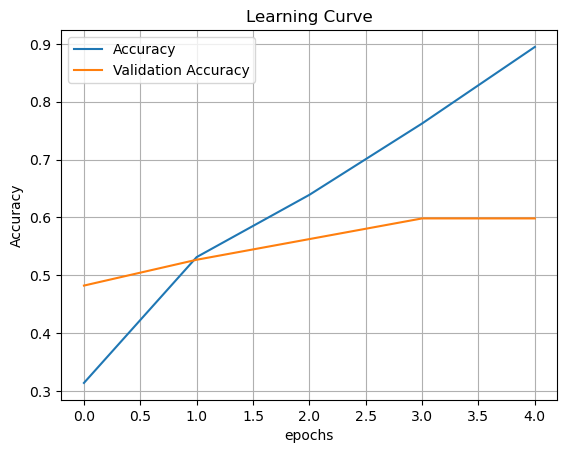

In [70]:
plt.title("Learning Curve")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.plot(history["accuracy"],label=("Accuracy"))
plt.plot(history["val_accuracy"],label=("Validation Accuracy"))
plt.grid(True)
#plt.style.use("seaborn-paper")
#plt.show()
plt.legend()

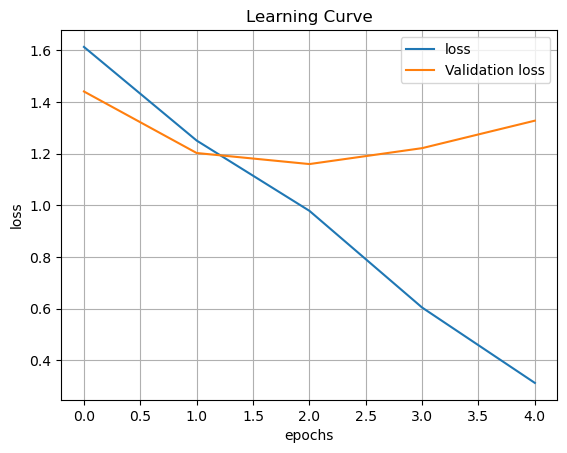

In [71]:
plt.title("Learning Curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(history["loss"],label=("loss"))
plt.plot(history["val_loss"],label=("Validation loss"))
plt.grid(True)
#plt.style.use("seaborn-paper")
#plt.show()
plt.legend()

In [89]:
img = cv2.imread("C:/Users/SREEHARI CR/data science/machine_test/27.jpg")

img = cv2.resize(img,(800,500))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#res = hcc.detectMultiScale(gray)

#for(x,y,w,h) in res:
#    cv2.rectangle(img,(x,y),(x+w, y+h),(255,255,255),2)


img = cv2.resize(img,(100,100))
img = np.array(img,dtype = 'uint8') 

cars= {"Hyundai_Creta":0, "mammokka":1 ,"Rolls_Royce":2,"Swift":3,"Toyota_Innova":4,}
pred_img = img.reshape(1,100,100,3)

face = loaded_model.predict(pred_img)
img = cv2.resize(img,(600,500))

#import cv2_imshow

for i in cars:
    if np.argmax(face) == cars[i]:
        name = i
        cv2.putText(img,name,(200,200),cv2.FONT_HERSHEY_SIMPLEX,.7,(0,255,0),2)
       
cv2.imshow('',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 57ms/step
